In [7]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

In [8]:
# DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
# USE AT LEAST 3 CONVOLUTION LAYERS
model = tf.keras.models.Sequential([
    #1
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape = (150,150,3)),
    tf.keras.layers.MaxPool2D((2,2)),
    
    #2
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    
    #3
    tf.keras.layers.Conv2D(64,(2,2),activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    
    #FLATTEN
    tf.keras.layers.Flatten(),
    
    #DENSE 1
    tf.keras.layers.Dense(512,activation='relu'),
    
    #DENSE 2
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [9]:
TRAINING_DIR = 'S:/DataSets/cell-images-for-detecting-malaria/cell_images/cell_images/Training/'
train_datagen = ImageDataGenerator(rescale=1./255)

# NOTE: YOU MUST USE A BATCH SIZE OF 10 (batch_size=10) FOR THE 
# TRAIN GENERATOR.
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,target_size=(150,150),
                                                   batch_size=10,
                                                   class_mode='binary')

VALIDATION_DIR = 'S:/DataSets/cell-images-for-detecting-malaria/cell_images/cell_images/Validation/'
validation_datagen = ImageDataGenerator(rescale=1./255)

# NOTE: YOU MUST USE A BACTH SIZE OF 10 (batch_size=10) FOR THE 
# VALIDATION GENERATOR.
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                             batch_size=10,
                                                             target_size=(150,150),
                                                             class_mode='binary')



# Expected Output:
# Found 2700 images belonging to 2 classes.
# Found 300 images belonging to 2 classes.

Found 2600 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [10]:
model.fit_generator(train_generator,steps_per_epoch = 100,validation_data=validation_generator,verbose=1,epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
260/260 [==============================] - 139s 535ms/step - loss: 0.6426 - acc: 0.6681 - val_loss: 1.0912 - val_acc: 0.1933
Epoch 2/10
260/260 [==============================] - 137s 527ms/step - loss: 0.3051 - acc: 0.9035 - val_loss: 2.9843 - val_acc: 0.0767
Epoch 3/10
260/260 [==============================] - 156s 602ms/step - loss: 0.2538 - acc: 0.9342 - val_loss: 4.4544 - val_acc: 0.1167
Epoch 4/10
260/260 [==============================] - 161s 621ms/step - loss: 0.2255 - acc: 0.9362 - val_loss: 3.2281 - val_acc: 0.1233
Epoch 5/10
260/260 [==============================] - 146s 560ms/step - loss: 0.2189 - acc: 0.9435 - val_loss: 5.0933 - val_acc: 0.1200
Epoch 6/10
260/260 [==============================] - 145s 556ms/step - loss: 0.2064 - acc: 0.9377 - val_loss: 5.7209 - val_acc: 0.0767
Epoch 7/10
260/260 [==============================] - 143s 550ms/step - loss: 0.1963 - acc: 0.9535 - val_loss: 7.0089 - val_acc: 0.0567


In [153]:
from keras.models import save_model

modell = save_model(model,'malariaclassification.h5')

In [24]:
test_data_gen = ImageDataGenerator(rescale=1./255)

test_gen = test_data_gen.flow_from_directory(r'S:/DataSets/cell-images-for-detecting-malaria/cell_images/cell_images/test/',
                                            target_size = (150,150),
                                            batch_size =10,
                                            class_mode ='binary')

Found 6 images belonging to 1 classes.


In [158]:
def prediction(img_loc):
    img = cv2.imread(img_loc)
    resized = cv2.resize(img,(150,150))
    d_imae = resized.reshape((1,150,150,3))
    plt.imshow(img)
    prediction = model.predict_classes(d_imae)
    
    print('class [[0]] --> Parasite')
    print('class [[1]] --> Uninfected')
    print('\n')
    print(f'The prediction from the model is of class {prediction}')
    return

class [[0]] --> Parasite
class [[1]] --> Uninfected


The prediction from the model is of class [[0]]


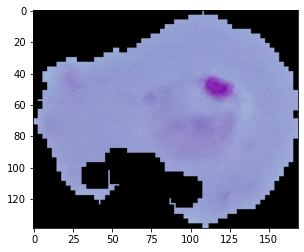

In [162]:
prediction(r'S:/DataSets/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144348_cell_139.png')

class [[0]] --> Parasite
class [[1]] --> Uninfected


The prediction from the model is of class [[1]]


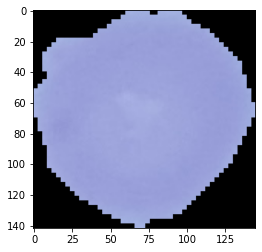

In [163]:
prediction(r'S:/DataSets/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_144.png')

In [151]:
images =[]

from keras.preprocessing import image

testing_folder = 'S:/DataSets/cell-images-for-detecting-malaria/cell_images/cell_images/test/'

try:
    for i in os.listdir(testing_folder):
        i = os.path.join(testing_folder,i)
        i = image.load_img(i,target_size=(150,150))
        i = image.img_to_array(i)
        images.append(i)

images = np.vstack(images)
model.predict(images)

SyntaxError: invalid syntax (<ipython-input-151-19d36e3c2d38>, line 14)

'S:/DataSets/cell-images-for-detecting-malaria/cell_images/cell_images/test/*png'